In [19]:
data = read.csv('data/gtex_filtered3d.csv', head=TRUE)
library('IHW')

In [20]:
data$group = groups_by_filter(data$x_value3, nbins = 20)

In [21]:
n_group = length(table(data$group))

In [22]:
threshold = numeric(n_group + 1)
for (i in seq(1, n_group-1, 1)) {
    low = max(data$x_value3[data$group == i])
    high = min(data$x_value3[data$group == i+1])
    threshold[i+1] = (low + high) / 2
}
threshold[1] = min(data$x_value3[data$group == 1]) - 1
threshold[n_group + 1] = max(data$x_value3[data$group == n_group]) + 1

In [23]:
m_groups = as.table(setNames(c(587048,587048,587048,587048,587048,587048,587048,556465,556465,535293,355527,466493,547763,469515,521010,511401,507023,491353,481096,515150), 1:20))

In [24]:
ihwRes <- ihw(data$p_value , as.factor(data$group), alpha = 0.1, m_groups = m_groups, nfolds=5L)

In [25]:
rejections(ihwRes)

[1] 30241

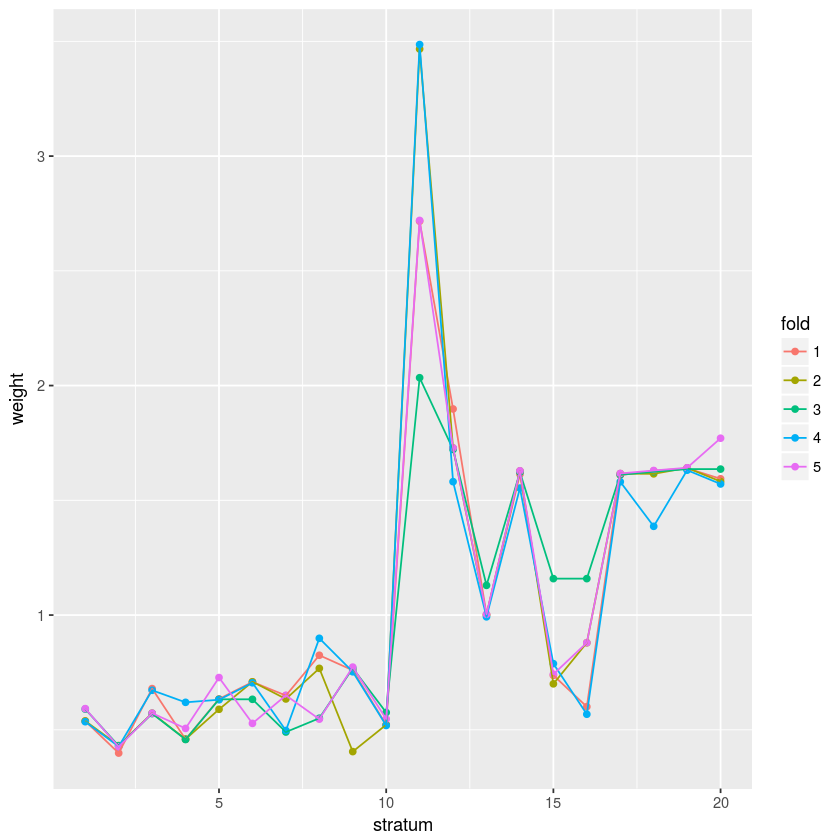

In [26]:
plot(ihwRes)